# Problem 1

In [1]:
# Importing relevant packages and doing necessary setup
import cv2
import matplotlib.pyplot as plt
import matplotlib
import PIL
import numpy as np

%matplotlib inline
# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [2]:
# Helper function to display multiple images in a plot
def display_images(images, rows, cols, size, title, subtitles):
    fig = plt.figure(figsize = size)
    c = 0
    sz = len(images)
    for i in range(rows):
        for j in range(cols):
            if sz == c:
                break
            ax1 = fig.add_subplot(rows, cols, c + 1)
            ax1.imshow(images[c], cmap = 'gray')
            ax1.set_title(subtitles[c], fontsize = 20)
            c = c + 1
    plt.show()
    # Un comment the below line and comment the above line to save and display
    #plt.savefig('part2.png')

In [3]:
def match(img, SE):
    if not (img.shape == SE.shape):
        print("Some error")
        return 1
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if SE[i][j] == -1:
                continue
            if SE[i][j] == img[i][j]:
                continue
            return 0
    return 1

In [4]:
def skeletonize(img, SE):
    output_img = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if (i - int(SE.shape[0] / 2)) >= 0 and (i + int(SE.shape[0] / 2)) < img.shape[0] and (j - int(SE.shape[1] / 2)) >= 0 and (j + int(SE.shape[1] / 2)) < img.shape[1]:
                if match(img[i - int(SE.shape[0] / 2): i + int(SE.shape[0] / 2) + 1, j - int(SE.shape[1] / 2): j + int(SE.shape[1] / 2) + 1], SE) == 1:
                    output_img[i][j] = 0
    return output_img

### FingerPrint

In [7]:
S1 = [[0, 0, 0], [-1, 1, -1], [1, 1, 1]]
S1 = np.array(S1)
S2 = [[-1, 0, 0], [1, 1, 0], [-1, 1, -1]]
S2 = np.array(S2)
img = cv2.imread('../input_data/fingerprint.jpg', cv2.IMREAD_GRAYSCALE)
# Thresholding
img = (img < 127).astype(np.uint8)
original_img = img
prev = img
while True:
    for j in range(4):
        img = skeletonize(img, S1)
        img = skeletonize(img, S2)
        S1 = np.rot90(S1)
        S2 = np.rot90(S2)
    delta = np.mean(np.abs(prev - img))
    if delta < 0.01:
        break
    else:
        print(delta)
    prev = img

0.10381770833333333
0.09591145833333334
0.06761979166666666
0.035203125
0.011630208333333333


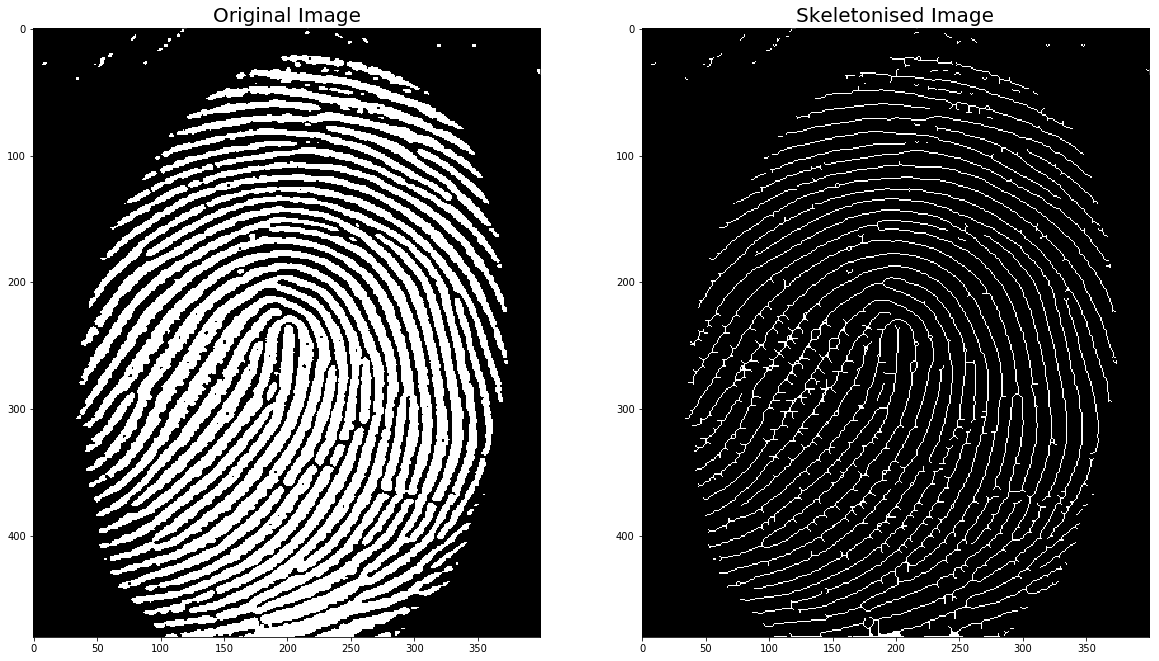

In [8]:
images = []
images.append(original_img)
images.append(img)
subtitles = []
subtitles.append('Original Image')
subtitles.append('Skeletonised Image')
display_images(images, 1, 2, (20, 20), '', subtitles)

### Image with Holes

In [14]:
S1 = [[0, 0, 0], [-1, 1, -1], [1, 1, 1]]
S1 = np.array(S1)
S2 = [[-1, 0, 0], [1, 1, 0], [-1, 1, -1]]
S2 = np.array(S2)
img = cv2.imread('../input_data/car.jpg', cv2.IMREAD_GRAYSCALE)
# Thresholding
img = (img < 127).astype(np.uint8)
original_img = img
prev = img
while True:
    for j in range(4):
        img = skeletonize(img, S1)
        img = skeletonize(img, S2)
        S1 = np.rot90(S1)
        S2 = np.rot90(S2)
    delta = np.mean(np.abs(prev - img))
    if delta < 0.006:
        break
    else:
        print(delta)
    prev = img

0.02883101851851852
0.02623263888888889
0.021643518518518517
0.01884259259259259
0.017170138888888888
0.016070601851851853
0.015289351851851853
0.014664351851851852
0.014126157407407407
0.013443287037037037
0.01302662037037037
0.012609953703703703
0.012366898148148148
0.011684027777777778
0.011215277777777777
0.010717592592592593
0.010300925925925925
0.009855324074074074
0.009427083333333334
0.009074074074074075
0.008854166666666666
0.008640046296296297
0.008391203703703705
0.008246527777777778
0.008113425925925927
0.00802662037037037
0.007910879629629629
0.007835648148148149
0.0077546296296296295
0.007581018518518518
0.0074594907407407405
0.007378472222222222
0.007309027777777778
0.007233796296296296
0.007112268518518519
0.007065972222222223
0.0070023148148148145
0.006944444444444444
0.006880787037037037
0.006828703703703704
0.006730324074074074
0.0064756944444444445
0.006313657407407408
0.006244212962962963


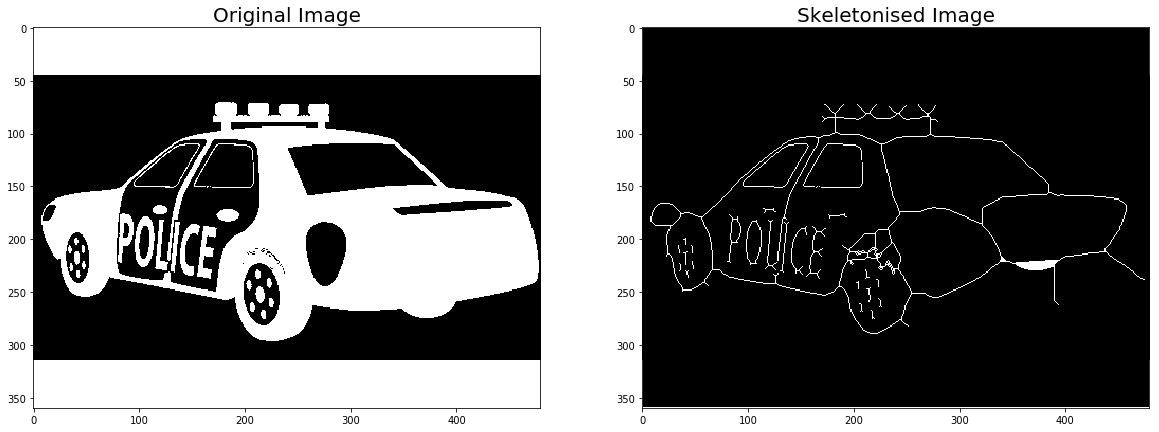

In [15]:
images = []
images.append(original_img)
images.append(img)
subtitles = []
subtitles.append('Original Image')
subtitles.append('Skeletonised Image')
display_images(images, 1, 2, (20, 20), '', subtitles)

### Thin Image

In [12]:
S1 = [[0, 0, 0], [-1, 1, -1], [1, 1, 1]]
S1 = np.array(S1)
S2 = [[-1, 0, 0], [1, 1, 0], [-1, 1, -1]]
S2 = np.array(S2)
img = cv2.imread('../input_data/needle.jpg', cv2.IMREAD_GRAYSCALE)
# Thresholding
img = (img > 127).astype(np.uint8)
original_img = img
prev = img
while True:
    for j in range(4):
        img = skeletonize(img, S1)
        img = skeletonize(img, S2)
        S1 = np.rot90(S1)
        S2 = np.rot90(S2)
    delta = np.mean(np.abs(prev - img))
    if delta < 0.001:
        break
    else:
        print(delta)
    prev = img

0.0036246913580246913


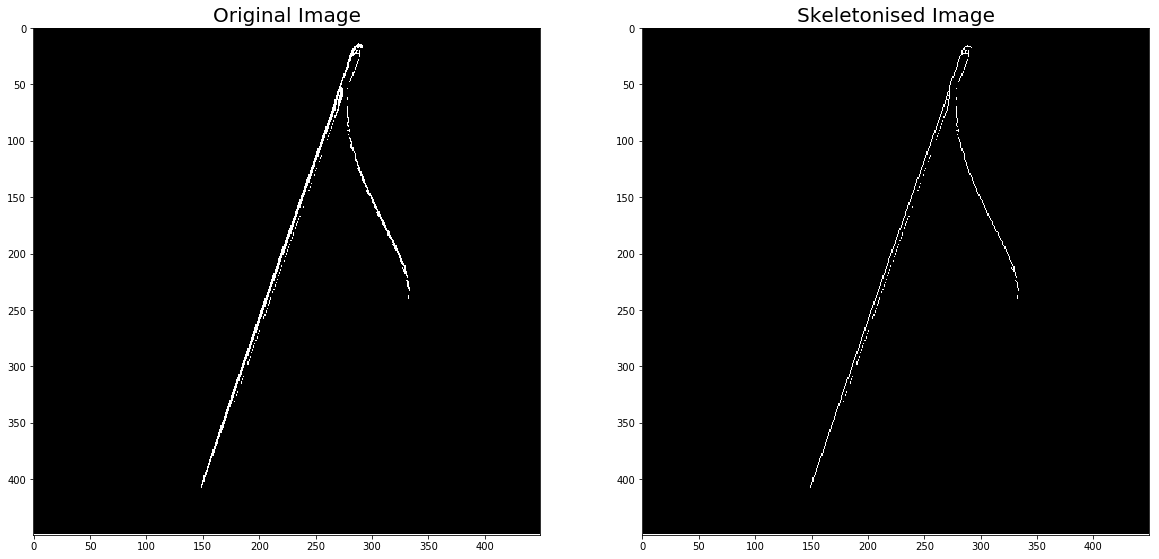

In [13]:
images = []
images.append(original_img)
images.append(img)
subtitles = []
subtitles.append('Original Image')
subtitles.append('Skeletonised Image')
display_images(images, 1, 2, (20, 20), '', subtitles)